<a href="https://colab.research.google.com/github/HarishSidagam8/Machine-Learning-Projects/blob/main/Project_18_Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [ ]:
data=pd.read_csv('/content/Rainfall.csv')

In [ ]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(366, 12)

In [ ]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
data['rainfall'].value_counts()

,count
rainfall,
yes,249
no,117


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.775342,1013.764658,26.176164,23.735068,21.881644,19.973425,80.161644,71.106849,4.413699,101.506849,21.536986
std,8.828584,6.409697,5.979563,5.635701,5.596385,5.997768,10.071648,21.824024,3.938285,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.800000,17.100000,16.100000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.700000,25.400000,23.700000,21.900000,80.000000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.500000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [ ]:
data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
#remove extra spaces in all columns
data.columns=data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data=data.drop(columns='day')

In [ ]:
data.head(2)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3


In [ ]:
data.replace({'no':0,'yes':1},inplace=True)

In [ ]:
data.head(2)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3


In [ ]:
# Exploratory data Analysis
sns.set(style='whitegrid')

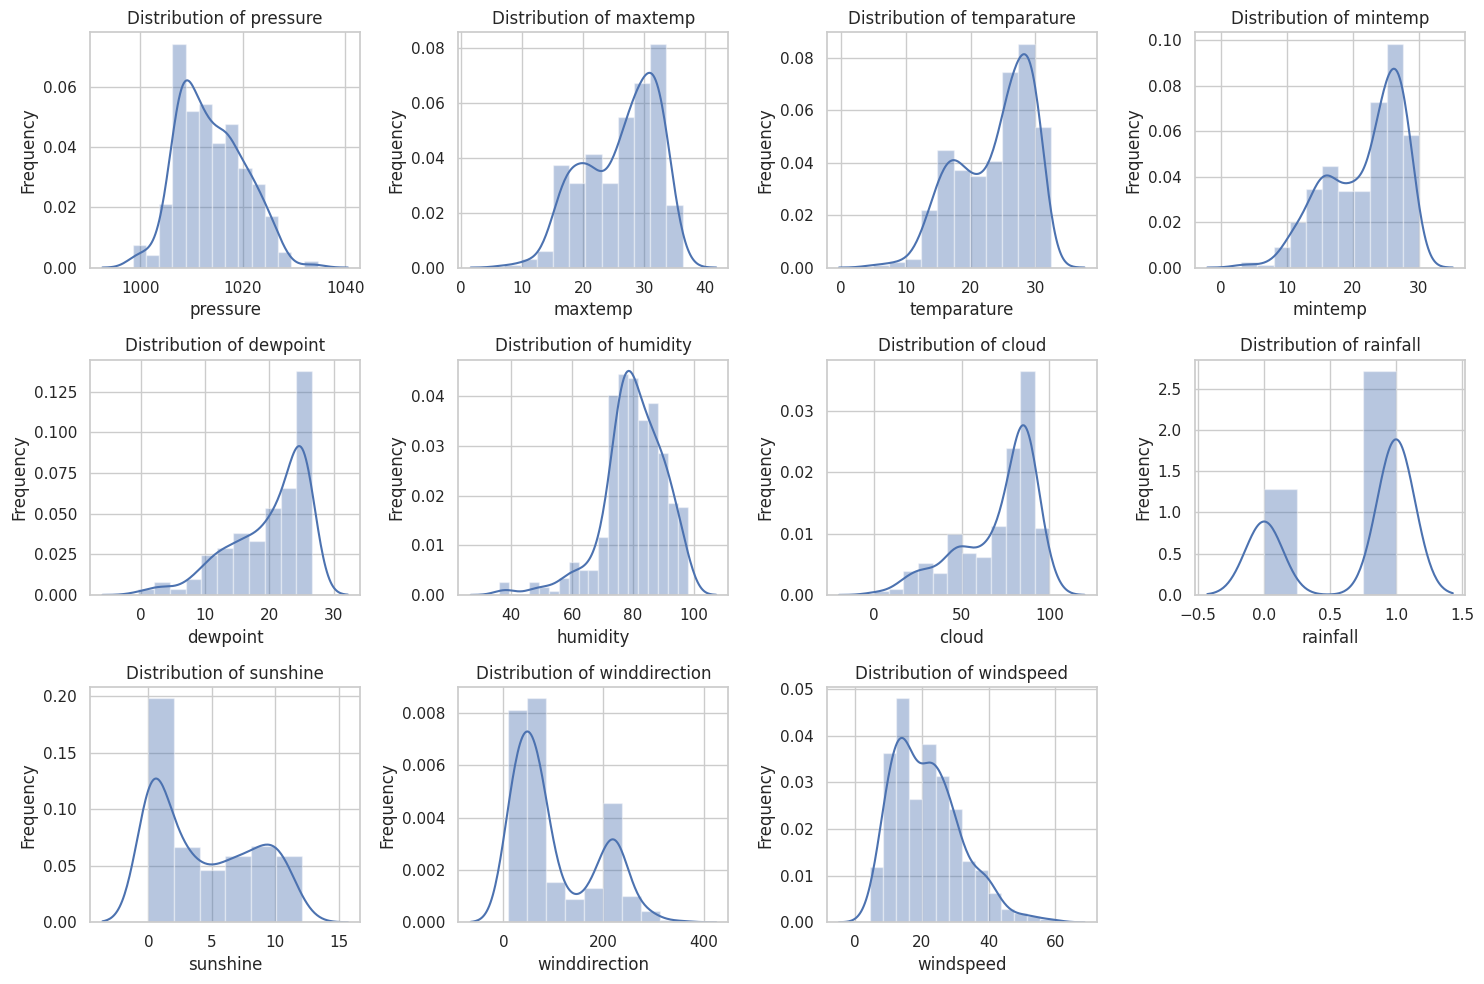

In [ ]:
#distribution of columns
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns):
  plt.subplot(3,4,i+1)
  sns.distplot(data[col])
  plt.tight_layout()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
plt.show()

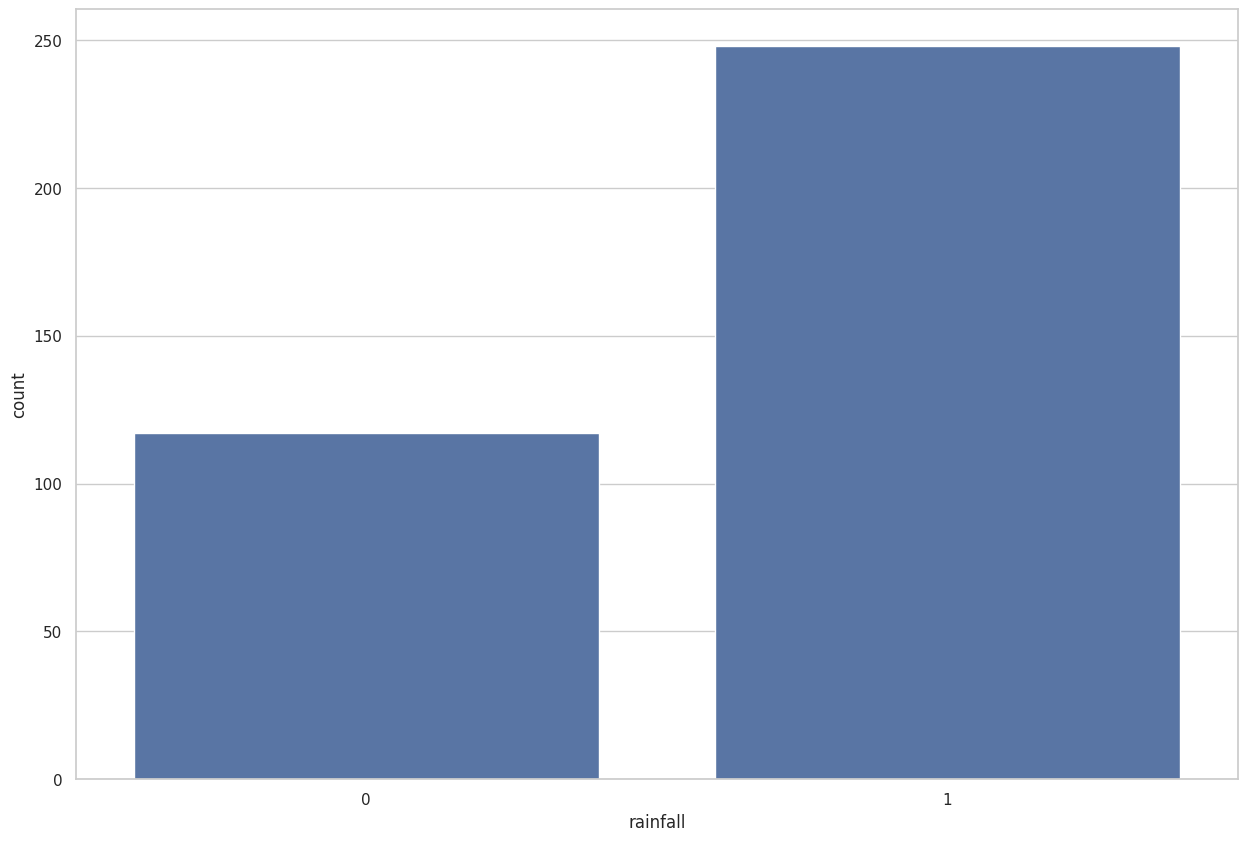

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='rainfall',data=data)
plt.show()

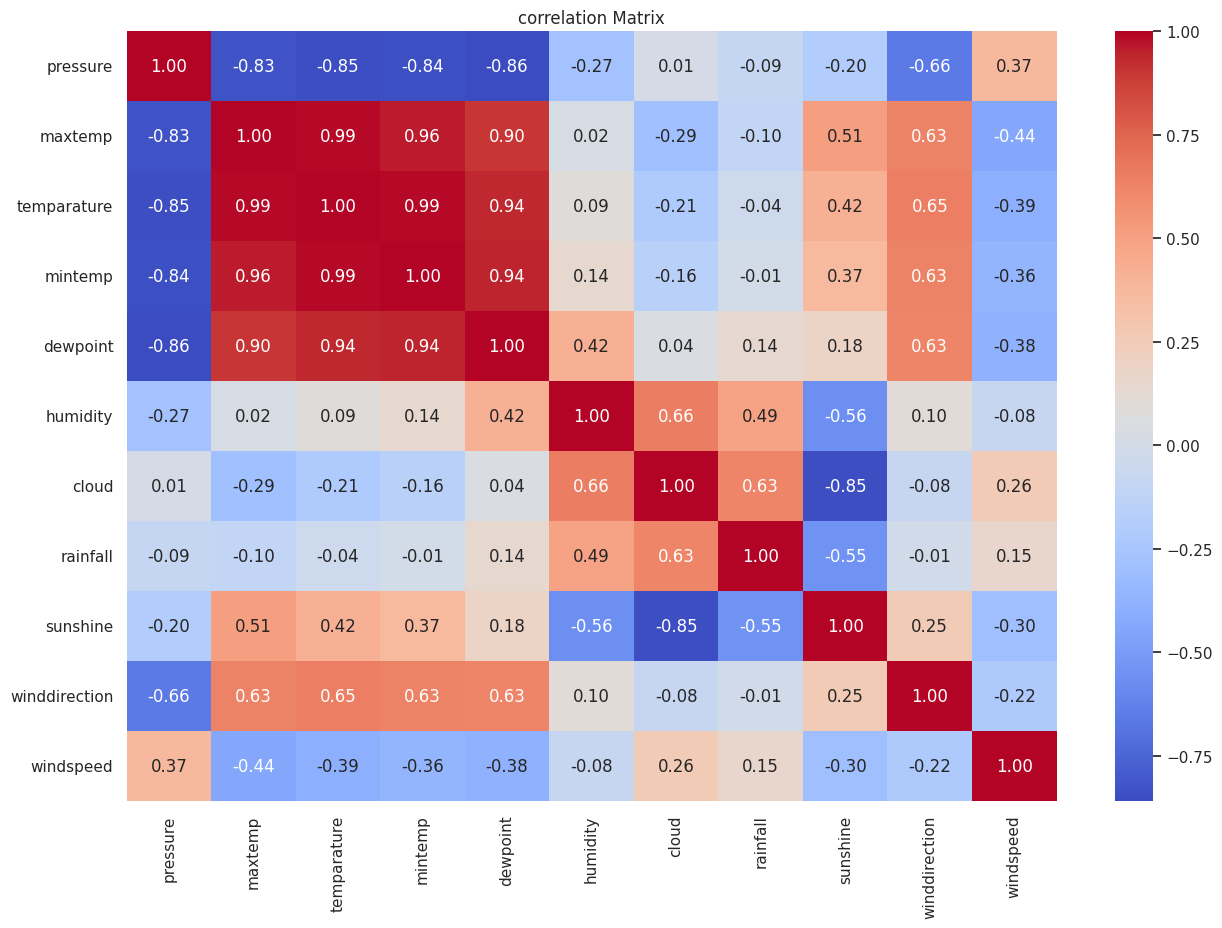

In [ ]:
# correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation Matrix')
plt.show()

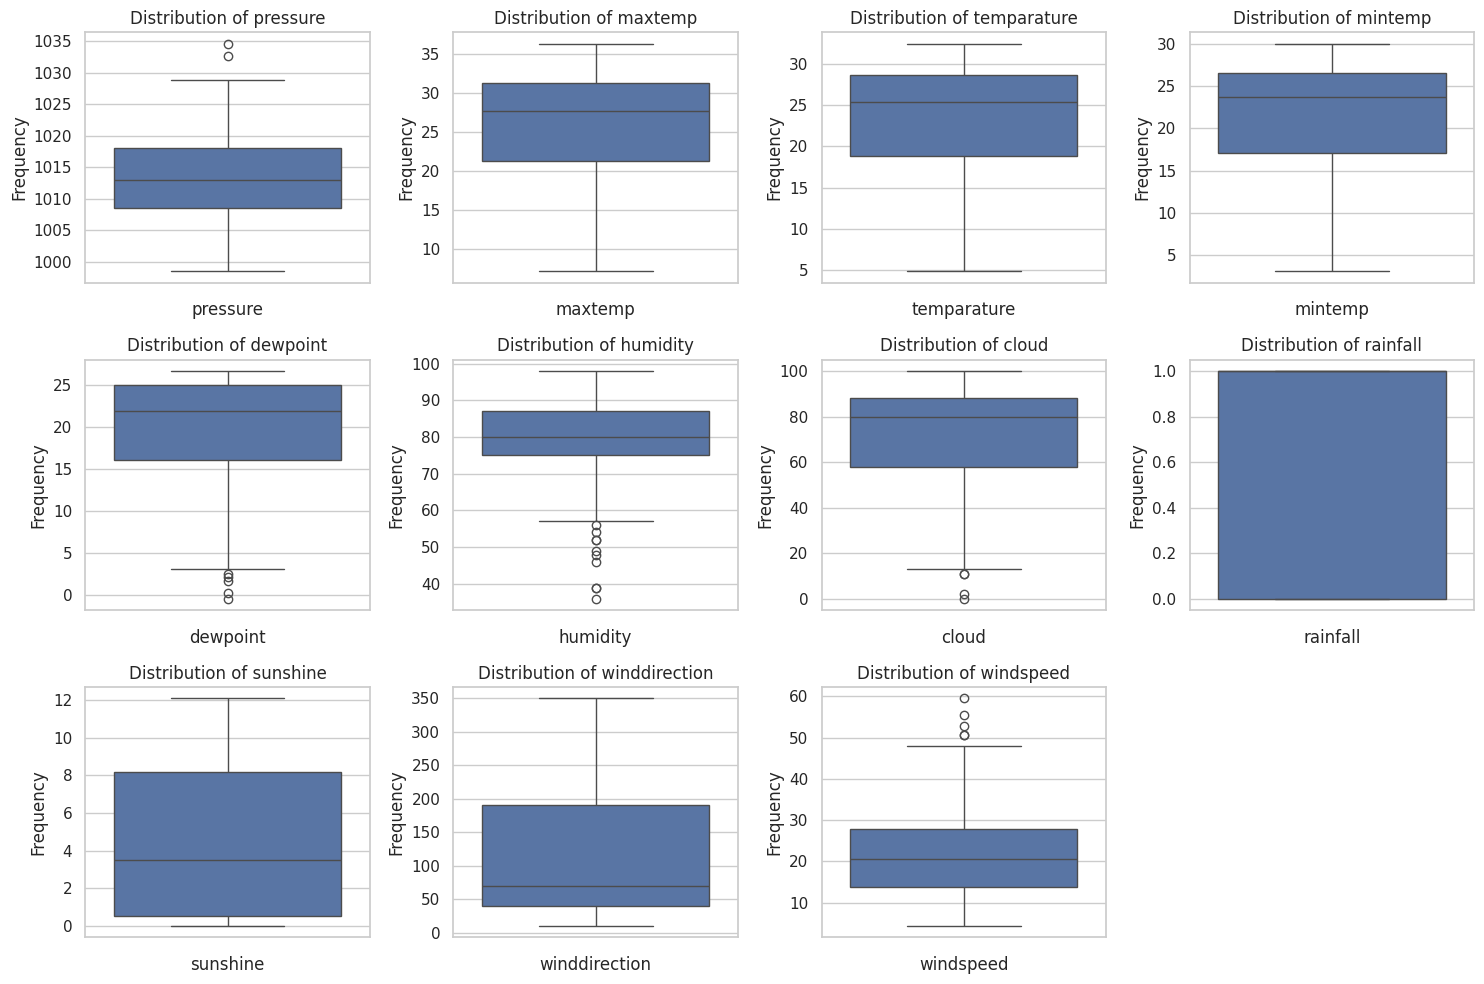

In [ ]:
#distribution of columns
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns):
  plt.subplot(3,4,i+1)
  sns.boxplot(data[col])
  plt.tight_layout()
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
plt.show()

In [ ]:
# drop highly correlated columns
data=data.drop(columns=['mintemp','maxtemp','temparature'])

In [ ]:
data.head(2)

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3


In [ ]:
data['rainfall'].value_counts()

,count
rainfall,
1,248
0,117


In [ ]:
# seperating majority and minority classes
df_majority=data[data['rainfall']==1]
df_minority=data[data['rainfall']==0]

In [ ]:
#downsample majority class
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [ ]:
df_majority_downsampled.shape

(117, 8)

In [ ]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [ ]:
# shuffle the final dataframe
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1012.7,25.0,92,85,1,0.7,140.0,12.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1016.4,17.8,85,83,1,0.0,70.0,30.3
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
# splitting the features and target
X=df_downsampled.drop(columns='rainfall')
y=df_downsampled['rainfall']

In [ ]:
# splitting training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Model Training
model=RandomForestClassifier(random_state=42)

In [ ]:
# Complete the param_grid
param_grid={
    'n_estimators':[50,100,200],
    'max_features':['sqrt','log2'],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score}")

# Train the model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, Y_train)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.7751066856330014


RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [ ]:
# Model Evaluation
cv_scores = cross_val_score(best_model, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.68421053 0.78947368 0.86486486 0.83783784 0.81081081]
Mean Cross-Validation Accuracy: 0.7974395448079659


In [ ]:
#test set performance
y_pred=best_model.predict(X_test)

print('Test set Accuracy',accuracy_score(Y_test,y_pred))
print('Confusion Matrix',confusion_matrix(Y_test,y_pred))
print('Classification Report',classification_report(Y_test,y_pred))

Test set Accuracy 0.8723404255319149
Confusion Matrix [[22  2]
 [ 4 19]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.90      0.83      0.86        23

    accuracy                           0.87        47
   macro avg       0.88      0.87      0.87        47
weighted avg       0.87      0.87      0.87        47



In [ ]:
#Predictive system

# Example input data (replace with your new data)
# The order of features should match the training data:
# 'pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'
input_data = (1012.7, 25.0, 92, 85, 0.7, 140.0, 12.5)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Make the prediction
prediction = best_model.predict(input_data_reshaped)

if (prediction[0] == 1):
  print('The model predicts it will rain')
else:
  print('The model predicts it will not rain')

The model predicts it will rain


In [ ]:
# Saving the model
model_data={
    'model':best_model,
    'feature_names':X.columns.tolist()
    }
with open('rainfall_prediction_model.pkl','wb') as file:
  pickle.dump(model_data,file)

In [ ]:
# Load the saved model for prediction
with open('rainfall_prediction_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Access the loaded model and feature names
model=loaded_model['model']
feature_names=loaded_model['feature_names']